In [ ]:
import numpy as np #导入numpy库
import matplotlib.pyplot as plt #导入matplotlib库
from sklearn import make_classification #导入sklearn库中的datasets
from sklearn.model_selection import train_test_split #导入sklearn库中的train_test_split

polt_x = np.linspace(-1,6,150) #生成1到6之间的150个点
print(polt_x)

[-1.         -0.95302013 -0.90604027 -0.8590604  -0.81208054 -0.76510067
 -0.71812081 -0.67114094 -0.62416107 -0.57718121 -0.53020134 -0.48322148
 -0.43624161 -0.38926174 -0.34228188 -0.29530201 -0.24832215 -0.20134228
 -0.15436242 -0.10738255 -0.06040268 -0.01342282  0.03355705  0.08053691
  0.12751678  0.17449664  0.22147651  0.26845638  0.31543624  0.36241611
  0.40939597  0.45637584  0.5033557   0.55033557  0.59731544  0.6442953
  0.69127517  0.73825503  0.7852349   0.83221477  0.87919463  0.9261745
  0.97315436  1.02013423  1.06711409  1.11409396  1.16107383  1.20805369
  1.25503356  1.30201342  1.34899329  1.39597315  1.44295302  1.48993289
  1.53691275  1.58389262  1.63087248  1.67785235  1.72483221  1.77181208
  1.81879195  1.86577181  1.91275168  1.95973154  2.00671141  2.05369128
  2.10067114  2.14765101  2.19463087  2.24161074  2.2885906   2.33557047
  2.38255034  2.4295302   2.47651007  2.52348993  2.5704698   2.61744966
  2.66442953  2.7114094   2.75838926  2.80536913  2.8

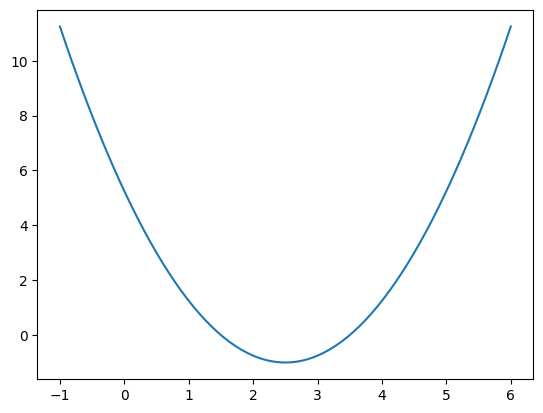

In [6]:
Plot_y = (polt_x - 2.5) ** 2 - 1 #生成y的值
plt.plot(polt_x,Plot_y) #绘制图形

In [39]:
def derivative(theta): #求导函数
    return 2 * (theta - 2.5)
def loss(theta): #损失函数
    return (theta - 2.5) ** 2 - 1
#以0作为theta的初始值
theta_history = []
#梯度下降函数
def gradient_descent(ini_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta=ini_theta
    i_iter = 0
    theta_history.append(theta)
    while  i_iter < n_iters:
        #计算当前对应点的梯度
        gradient = derivative(theta)
        #积累theta前先记录上一次的theta
        last_theta = theta
        #更新theta，向导数的负方向移动一步，步长为eta用来控制学习率  
        theta = theta - eta * gradient
        #记录theta的变化
        theta_history.append(theta)
        #如果损失函数的值几乎不再发生变化，那么就可以认为已经收敛
        if(abs(loss(theta) - loss(last_theta)) < epsilon):
            break
        i_iter += 1
#绘制图形
def plot_theta_history():
    plt.plot(polt_x,Plot_y)
    plt.plot(np.array(theta_history),loss(np.array(theta_history)),color='r',marker='o')
    plt.show()

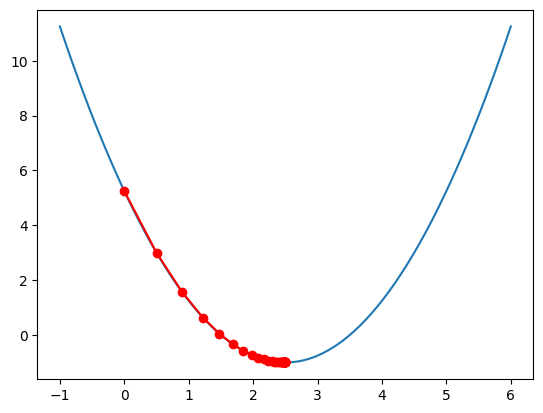

46

In [34]:
eta = 0.1
epsilon = 1e-8
theta_history = []
gradient_descent(0.,eta,epsilon)
plot_theta_history()
len(theta_history)

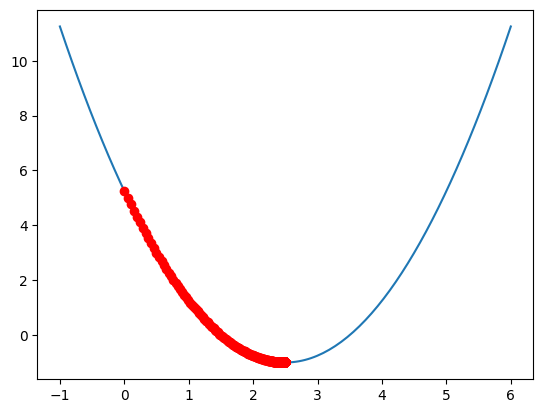

424

In [ ]:
eta = 0.01 #学习率,共424步
epsilon = 1e-8
theta_history = []
gradient_descent(0.,eta,epsilon)
plot_theta_history()
len(theta_history)

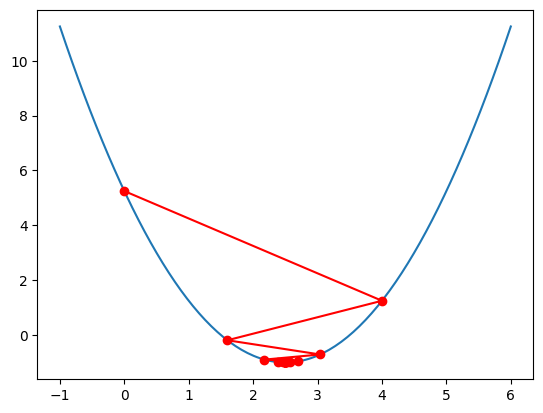

22

In [ ]:
eta = 0.8 #学习率0.8,步长较大，可能会导致越过最优解
epsilon = 1e-8
theta_history = []
gradient_descent(0.,eta,epsilon)
plot_theta_history()
len(theta_history)

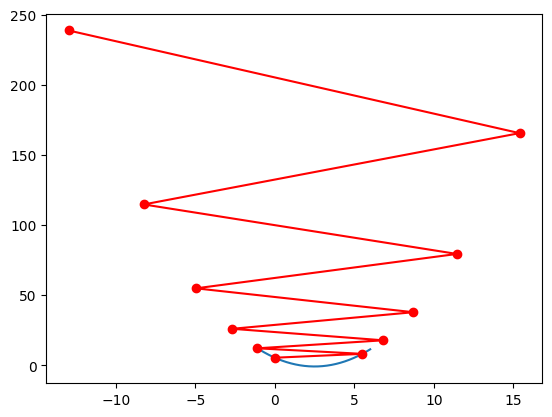

11

In [41]:
eta = 1.1 #学习率过大
epsilon = 1e-8
theta_history = []
gradient_descent(0.,eta,n_iters=10)
plot_theta_history()
len(theta_history)
#学习率过大，导致越过最优解，损失函数值不断增大，最终无法收敛

第二周作业

In [49]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification
#1,数据准备，参数初始化
X,y = make_classification(n_features=10)
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,shuffle=True)
#weight parameter
theta = np.random.rand(1,10)
bias = 0
#Hyper parameter
learning_rate = 0.001
epoch = 5000
#2,模型运算
def forward_propagation(train_X,theta,bias):
    #计算linear regression
    z = np.dot(train_X,theta.T) + bias
    #计算sigmoid
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat
#3,计算损失函数
def loss_function(y_hat,train_y):
    e = 1e-8
    loss = -np.mean(train_y * np.log(y_hat + e) + (1 - train_y) * np.log(1 - y_hat + e))
    return loss
#4,计算梯度
def  calc_gradient(train_X,train_y,y_hat):
    m=train_X.shape[-1]
    d_theta = np.dot((y_hat - train_y).T,train_X) / m
    d_bias = np.mean(y_hat - train_y)
    return d_theta,d_bias
#5,更新参数
def update_parameters(theta,bias,d_theta,d_bias,learning_rate):
    theta = theta - learning_rate * d_theta
    bias = bias - learning_rate * d_bias
    return theta,bias
#6,模型训练
for i in range(epoch):
    #前向传播
    y_hat = forward_propagation(train_X,theta,bias)
    #计算损失函数
    loss = loss_function(y_hat,train_y)
    #计算梯度
    d_theta,d_bias = calc_gradient(train_X,train_y,y_hat)
    #更新参数
    theta,bias = update_parameters(theta,bias,d_theta,d_bias,learning_rate)
    if i % 100 == 0:
        print('epoch:',i,'loss:',loss)

#7,模型测试
idx = np.random.randint(len(test_X))
x = test_X[idx]
y = test_y[idx]
def predict(x):
    pred = forward_propagation(x,theta,bias)[0]
    if pred > 0.5:
        return 1
    else: 
        return 0
pred = predict(x)
print(f'预测值：{pred} 真实值：{y}')

epoch: 0 loss: 1.030754904990108
epoch: 100 loss: 0.9032398617319395
epoch: 200 loss: 0.8190198453358997
epoch: 300 loss: 0.7662166136588913
epoch: 400 loss: 0.7335553365351899
epoch: 500 loss: 0.7131692658362708
epoch: 600 loss: 0.7002375787260163
epoch: 700 loss: 0.6918926473715126
epoch: 800 loss: 0.6864193569706504
epoch: 900 loss: 0.6827764542243756
epoch: 1000 loss: 0.6803202291294862
epoch: 1100 loss: 0.6786452376160258
epoch: 1200 loss: 0.6774915528265969
epoch: 1300 loss: 0.6766898503161615
epoch: 1400 loss: 0.6761282573575914
epoch: 1500 loss: 0.6757319410104559
epoch: 1600 loss: 0.6754503015881527
epoch: 1700 loss: 0.6752487994470888
epoch: 1800 loss: 0.6751036592179608
epoch: 1900 loss: 0.6749983924996775
epoch: 2000 loss: 0.6749214877054712
epoch: 2100 loss: 0.6748648593019985
epoch: 2200 loss: 0.6748227971136993
epoch: 2300 loss: 0.6747912484676536
epoch: 2400 loss: 0.6747673240189134
epoch: 2500 loss: 0.6747489552158585
epoch: 2600 loss: 0.6747346553893078
epoch: 2700 lo